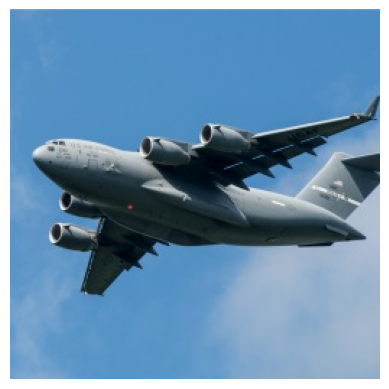

In [8]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("c:/images/plane_256x256.jpg")

image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis("off")
plt.show()

In [9]:
import numpy as np

# 배경을 제거하고자 하는 전경 주위에 사각형 박스를 그리고 grabCut 알고리즘 적용
# 사각영역: x, y, width, height
rect = (0, 56, 256, 150)

# 초기 마스크 생성
mask1 = np.zeros(image_rgb.shape[:2], np.uint8)

# grabCut에 사용할 임시 배열 생성
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# grabCut 실행
cv2.grabCut(image_rgb, # 원본 이미지
           mask1,       # 마스크
           rect,  # 사각영역
           bgdModel,   # 배경을 위한 임시 배열
           fgdModel,   # 전경을 위한 임시 배열
           5,          # 반복 횟수
           cv2.GC_INIT_WITH_RECT) # 사각 영역으로 초기화

# 배경인 곳은 0, 그 외에는 1로 설정한 마스크 생성
mask2 = np.where((mask1==2) | (mask1==0), 0, 1).astype('uint8')

image_rgb_nobg = image_rgb * mask2[:, :, np.newaxis]

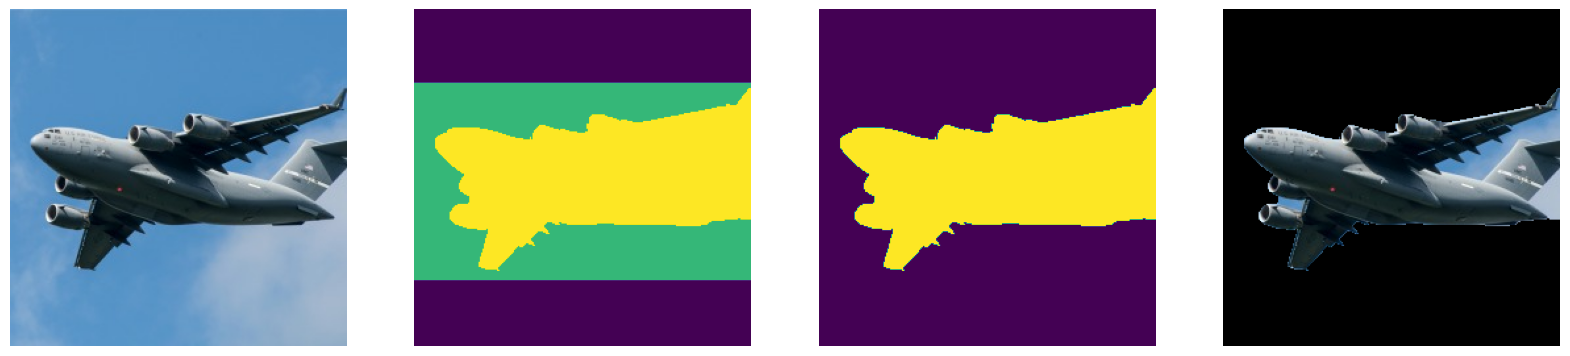

In [10]:
plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.imshow(image_rgb)
plt.axis("off")
plt.subplot(1, 4, 2)
plt.imshow(mask1)
plt.axis("off")
plt.subplot(1, 4, 3)
plt.imshow(mask2)
plt.axis("off")
plt.subplot(1, 4, 4)
plt.imshow(image_rgb_nobg)
plt.axis("off")
plt.show()